In [17]:
__author__ = 'Oskar Martin'
__email__ = 'oscar.martink1@gmail.com'
__website__ = '...TO_DO...'

In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning) # Ignore warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Data Exploration

Dataset is obtained from sklearn --> https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(cancer.DESCR[27:3130]) #.DESCR --> full description of dataset


Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radius, field
        10 is Rad

In [6]:
df_features = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [53]:
cancer.target_names # Target class is malignant - benign (type of cancer)

array(['malignant', 'benign'], dtype='<U9')

In [7]:
df_target = pd.DataFrame(cancer.target, columns=['target'])
df_target['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [8]:
df = pd.concat([df_features, df_target], axis=1)

Change tags 0, 1 to text for exploratory data analysis

In [9]:
df['target'] = df['target'].apply(lambda x: 'Benign' if x == 1 else 'Malignant')
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Malignant


In [61]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Text(0.5, 1.0, 'Count Plot Diagnosis')

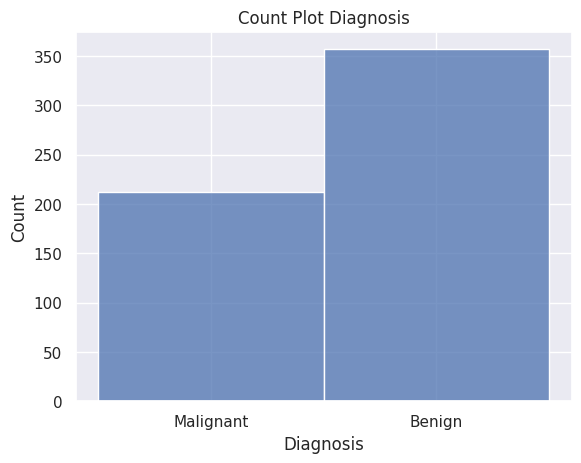

In [10]:
sns.set_theme(style='darkgrid')

sns.histplot(df['target'])
plt.xlabel('Diagnosis')
plt.title('Count Plot Diagnosis')

### Analyze distribution of each feature in the data

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_features)

features_scaled = scaler.transform(df_features)
features_scaled = pd.DataFrame(data=features_scaled,
                               columns=df_features.columns)

df_scaled = pd.concat([features_scaled, df['target']], axis=1)

df_scaled.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,Malignant
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,Malignant
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,Malignant


In [12]:
df_scaled_melt = pd.melt(df_scaled, id_vars='target', var_name='features', value_name='value')

df_scaled_melt.head(3)

,target,features,value
0,Malignant,mean radius,1.097064
1,Malignant,mean radius,1.829821
2,Malignant,mean radius,1.579888


Visualize features with violin, swarm and box plot 10 by 10

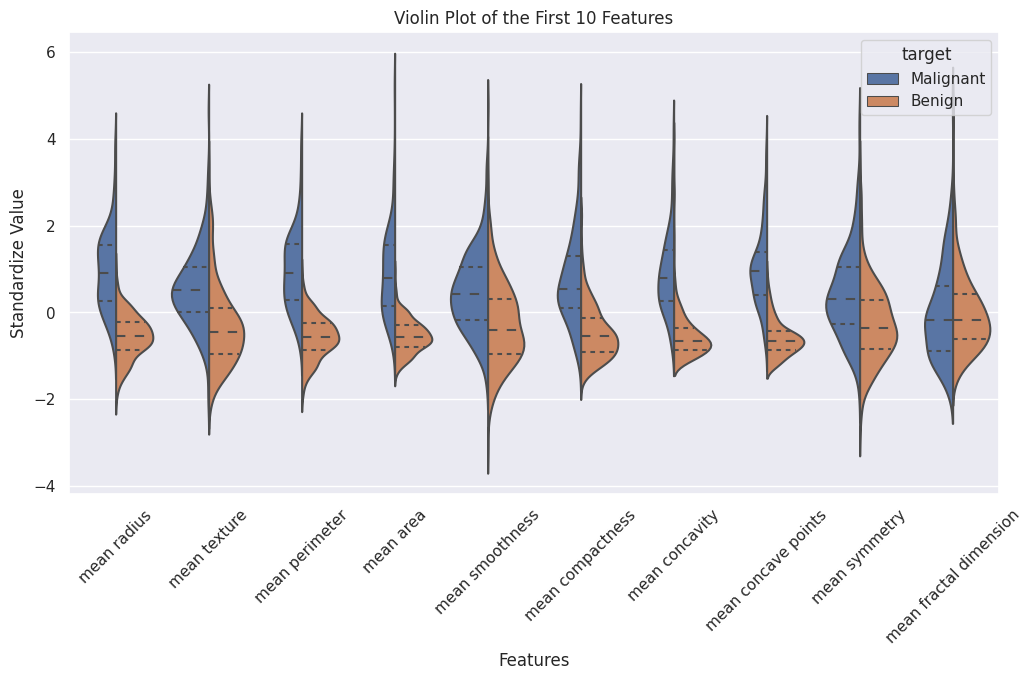

In [15]:
def violin_plot(features, name): # Perfect for comparing distributions in different features
    '''
    This function creates violin plots of the features specified in the argument.
    '''
    
    # Filter data to desired features
    data = df_scaled_melt[df_scaled_melt['features'].isin(features)]
    
    # Create Plot
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='features',
                   y='value',
                   hue='target',
                   data=data,
                   split=True,
                   inner='quart')
    plt.xticks(rotation=45)
    plt.title(name)
    plt.xlabel('Features')
    plt.ylabel('Standardize Value')
    
    plt.savefig('miculo.png')
    
violin_plot(df.columns[0:10], "Violin Plot of the First 10 Features")

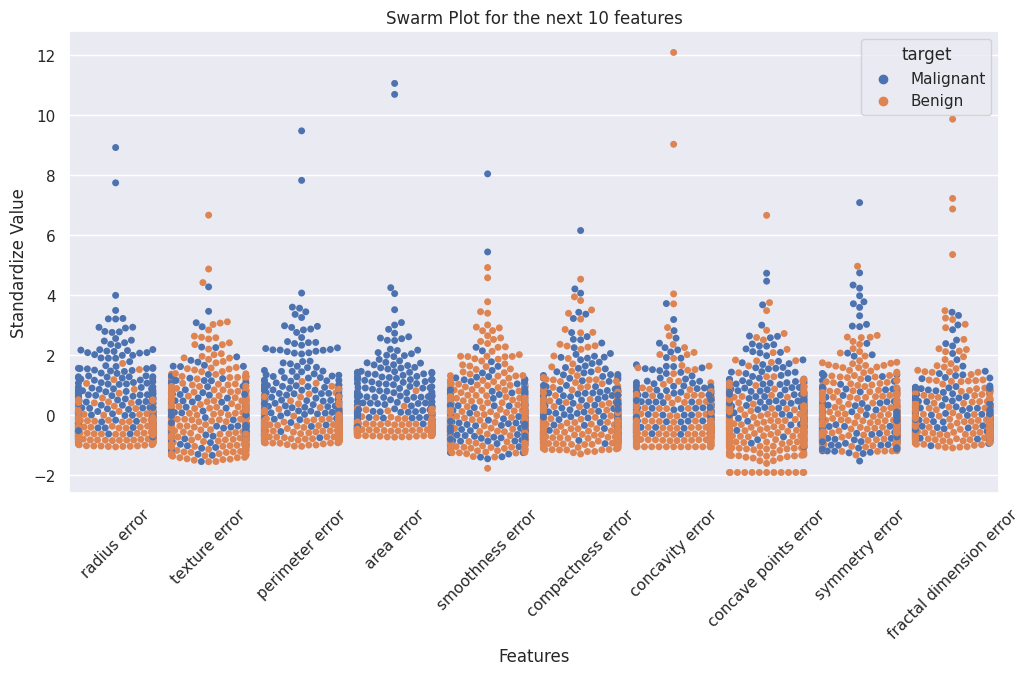

In [14]:
def swarm_plot(features, name): # Good for detecting classification
    '''
    This function creates swarm plots of the features specified in the argument
    '''
    
    # Filter data to desired features
    data = df_scaled_melt[df_scaled_melt['features'].isin(features)]
    
    # Create Plot
    plt.figure(figsize=(12, 6))
    sns.swarmplot(x='features', y='value', hue='target', data=data)
    plt.xticks(rotation=45)
    plt.title(name)
    plt.xlabel("Features")
    plt.ylabel("Standardize Value")
    
swarm_plot(df.columns[10:20], 'Swarm Plot for the next 10 features')
    

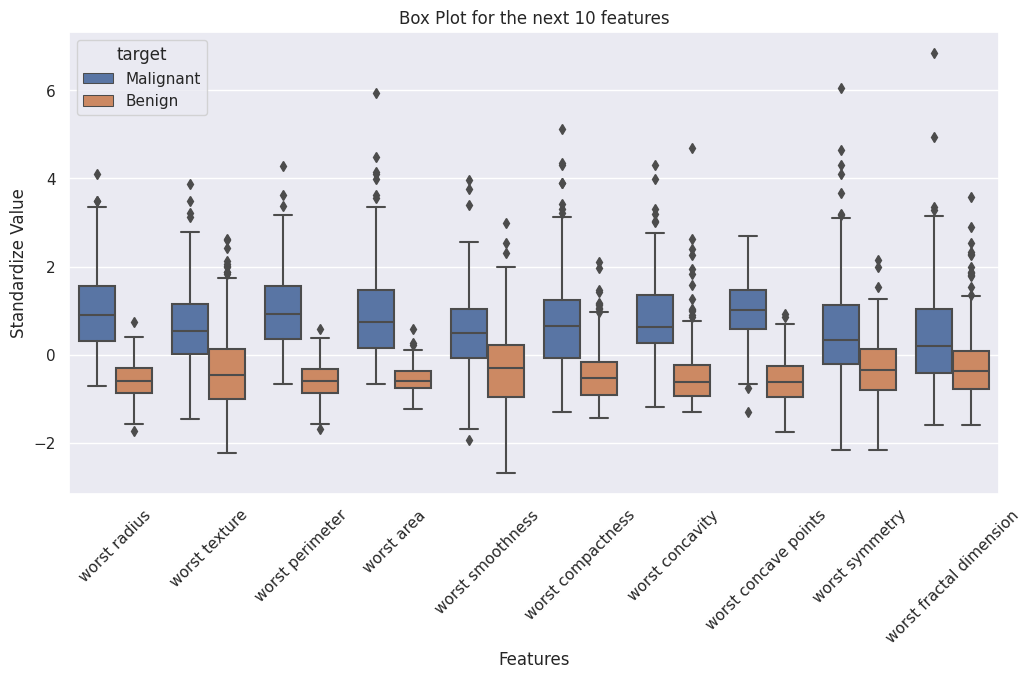

In [116]:
def box_plot(features, name): # Good for comparing median data and detecting outliers
    '''
    This function creates box plots of the features specified in the argument
    '''
    
    # Filter data to desired features
    data = df_scaled_melt[df_scaled_melt['features'].isin(features)]
    
    # Create Plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='features', y='value', hue='target', data=data)
    plt.xticks(rotation=45)
    plt.title(name)
    plt.xlabel("Features")
    plt.ylabel("Standardize Value")
    
box_plot(df.columns[20:30], 'Box Plot for the next 10 features')

### Analyze correlation between the features

Correlation:  0.9865068039913907
Correlation:  0.9213910263788588
Correlation:  0.537848206253609
Correlation:  0.9651365139559872


<Figure size 600x600 with 0 Axes>

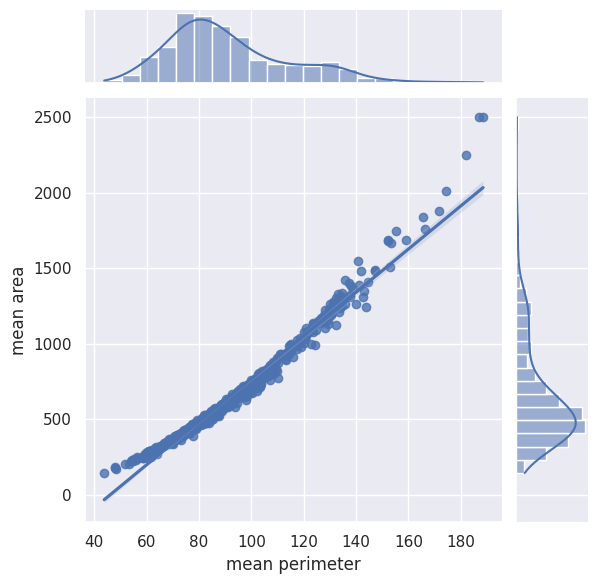

<Figure size 600x600 with 0 Axes>

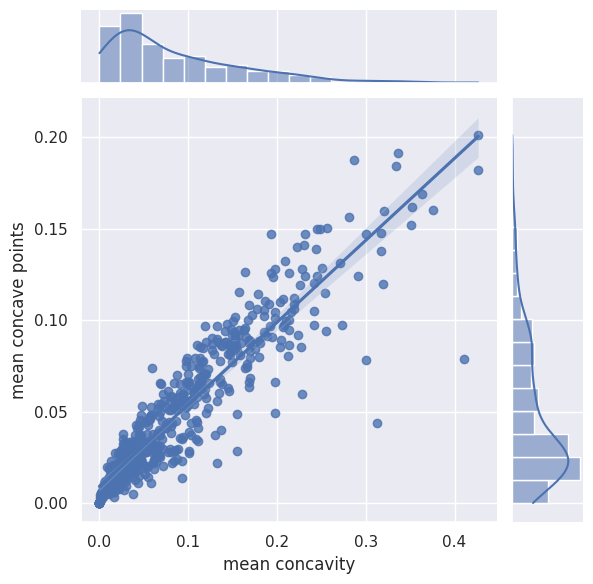

<Figure size 600x600 with 0 Axes>

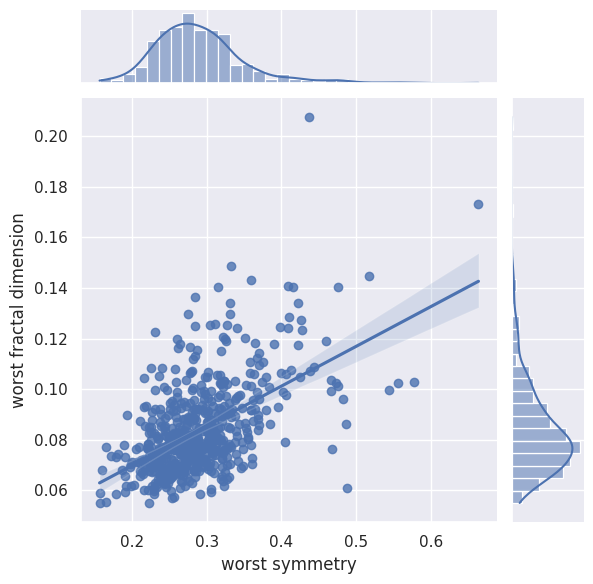

<Figure size 600x600 with 0 Axes>

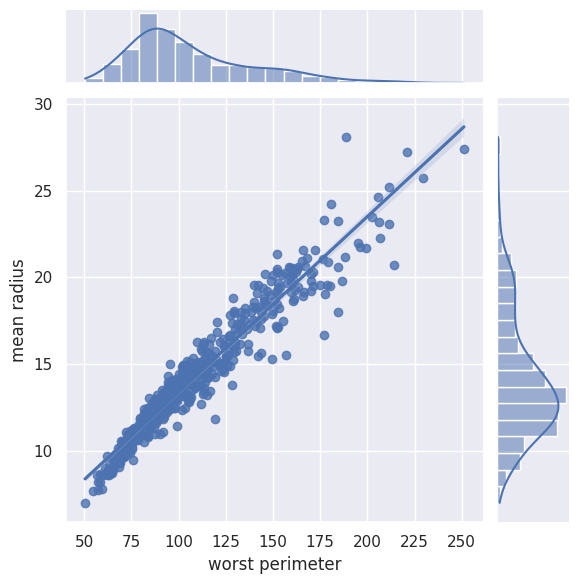

In [138]:
def correlation(var):
    '''
    1. Print correlation
    2. Create jointplot
    '''
    
    # Print correlation
    print('Correlation: ', df[[var[0], var[1]]].corr().iloc[1, 0])
    
    # Create Jointplot
    plt.figure(figsize=(6,6))
    sns.jointplot(x=df[var[0]], y=df[var[1]], kind='reg')

correlation(['mean perimeter', 'mean area'])
correlation(['mean concavity', 'mean concave points'])
correlation(['worst symmetry', 'worst fractal dimension'])
correlation(['worst perimeter', 'mean radius'])

<AxesSubplot: >

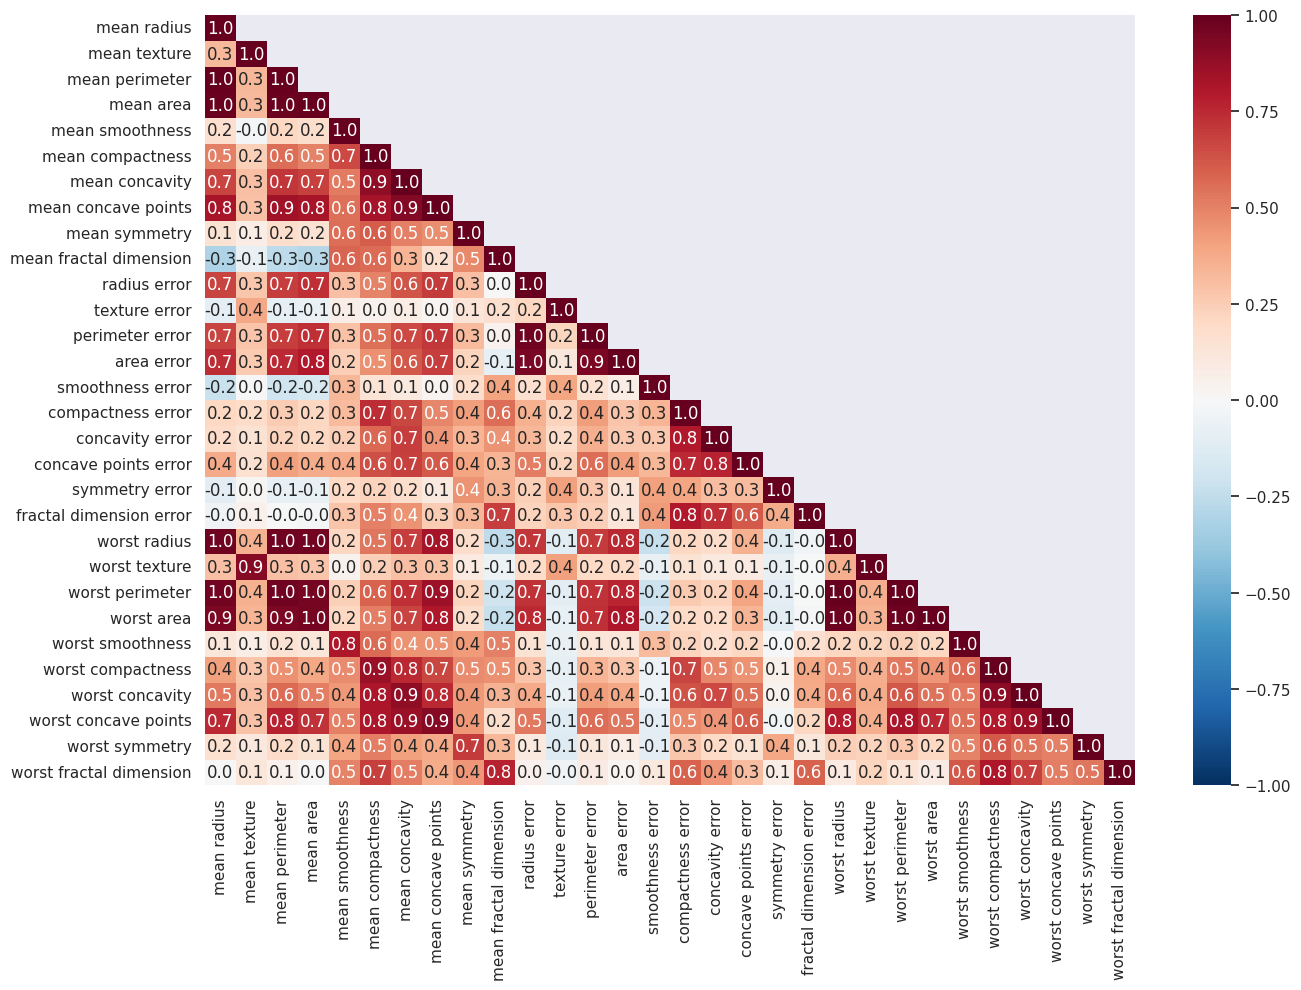

In [137]:
# Create correlation matrix
corr_mat = df.corr()

# Create mask
mask = np.zeros_like(corr_mat, dtype=bool)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_mat, annot=True, fmt='.1f', cmap='RdBu_r', vmin=-1, vmax=1, mask=mask)

<AxesSubplot: >

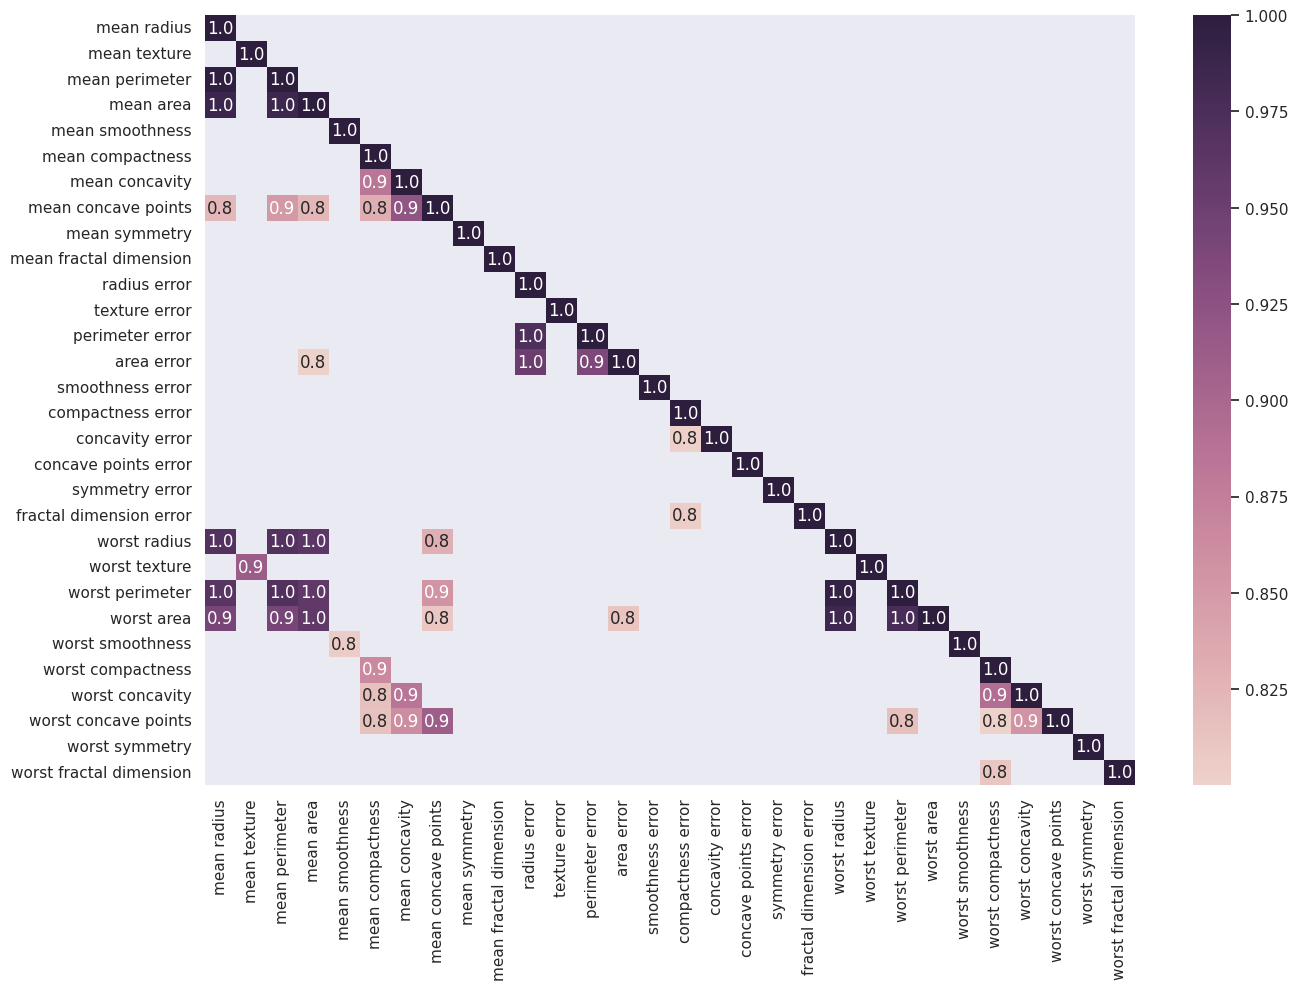

In [139]:
 # Display only highly correlated features (corr > 0.8)
plt.figure(figsize=(15,10))
sns.heatmap(corr_mat[corr_mat > 0.8], annot=True, fmt='.1f', cmap=sns.cubehelix_palette(200), mask=mask)

### Model Creation with Feature Selection and RFC

Model creation using univariate feature selection to choose the six features with the k highest scores. Six because from the heatmap it seems that about six groups of features are highly correlated

In [193]:
from sklearn.feature_selection import SelectKBest, chi2

feature_selection = SelectKBest(chi2, k=6)
feature_selection.fit(df_features, df_target)
selected_features = df_features.columns[feature_selection.get_support()]
print('The selected features are: 0', list(selected_features))

The selected features are: 0 ['mean perimeter', 'mean area', 'area error', 'worst radius', 'worst perimeter', 'worst area']


In [194]:
X = pd.DataFrame(feature_selection.transform(df_features), columns=selected_features)
X.head()

,mean perimeter,mean area,area error,worst radius,worst perimeter,worst area
0,122.80,1001.0,153.40,25.38,184.60,2019.0
1,132.90,1326.0,74.08,24.99,158.80,1956.0
2,130.00,1203.0,94.03,23.57,152.50,1709.0
3,77.58,386.1,27.23,14.91,98.87,567.7
4,135.10,1297.0,94.44,22.54,152.20,1575.0


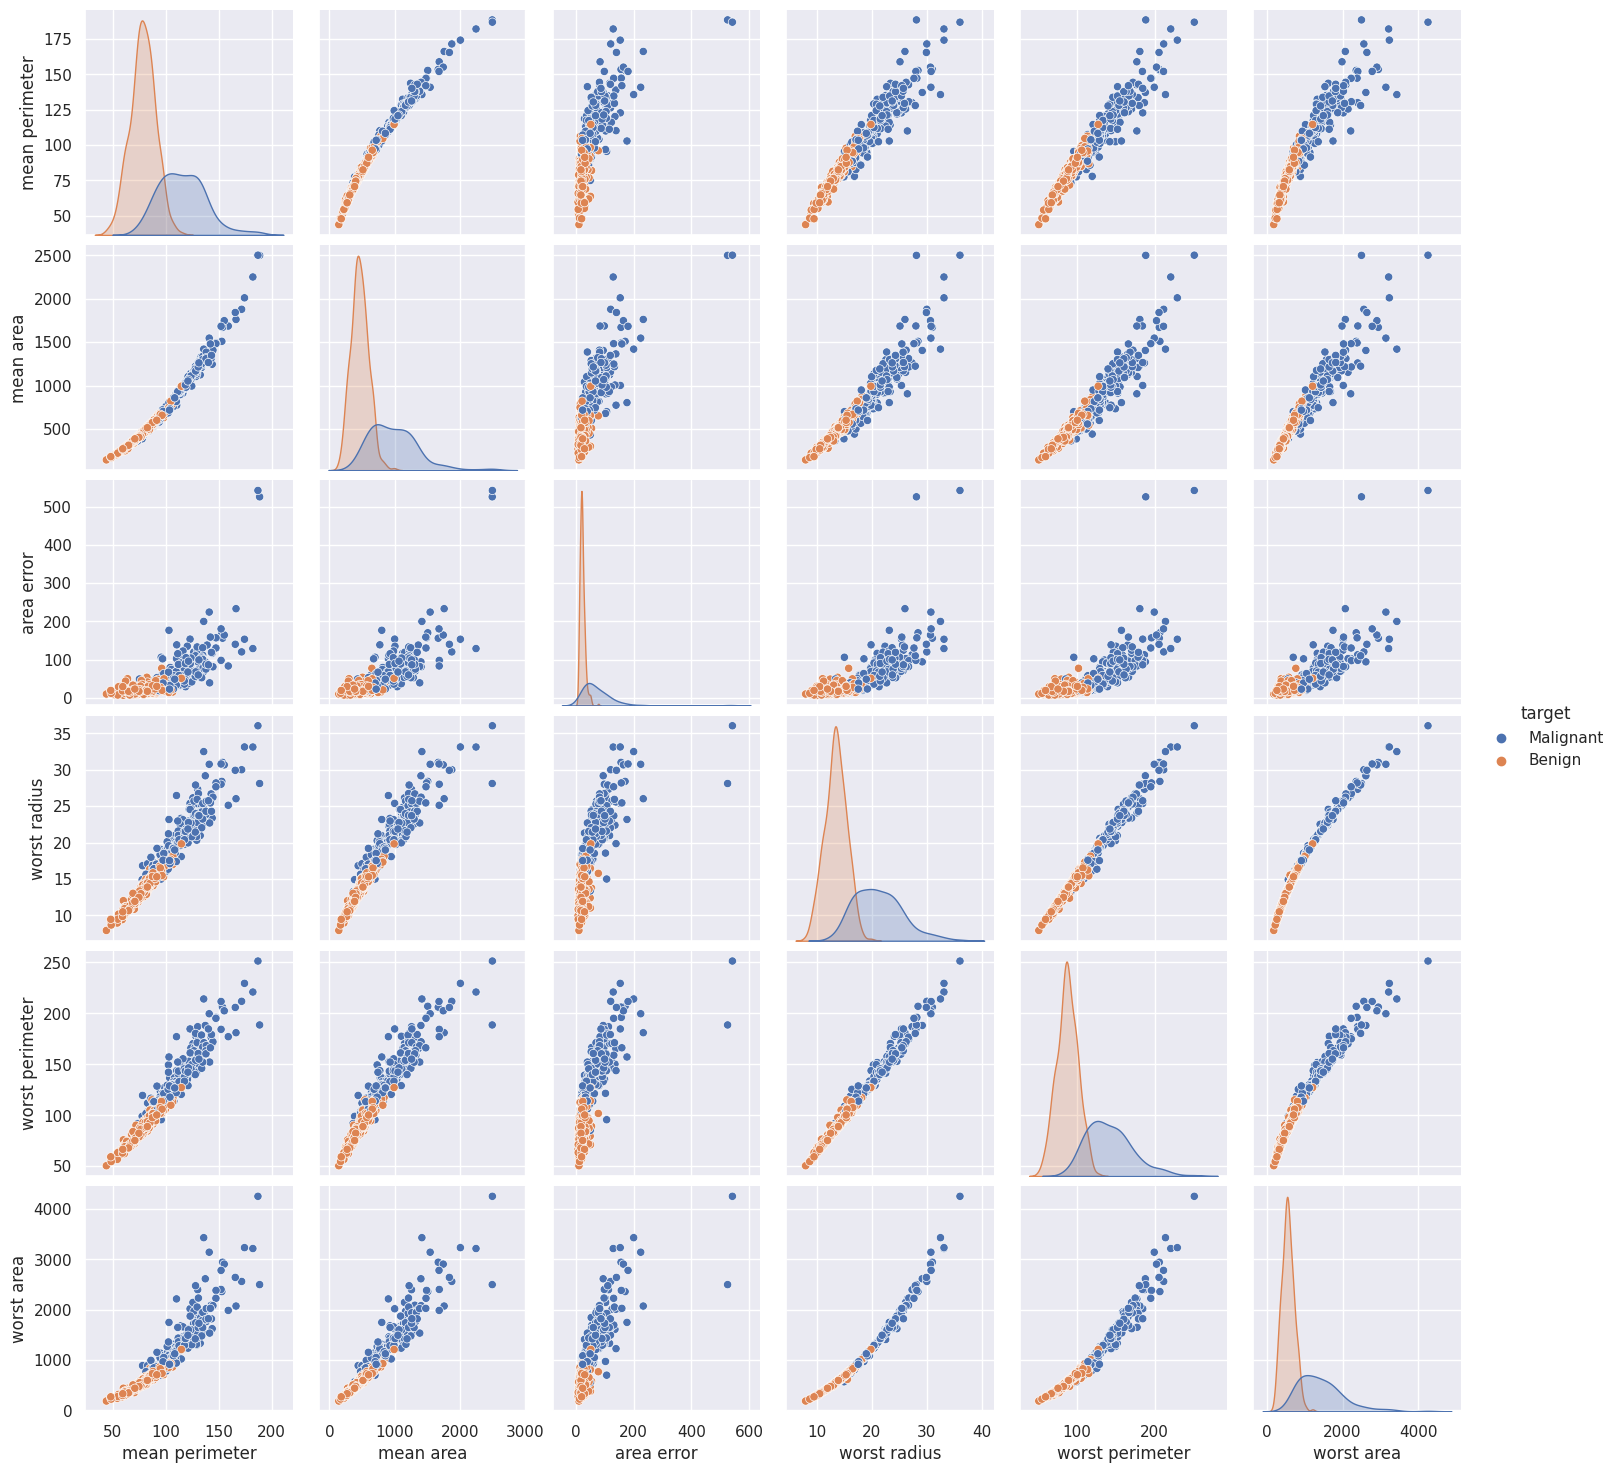

In [195]:
sns.pairplot(pd.concat([X, df['target']], axis=1), hue='target')

#### Train - Test Split

In [196]:
from sklearn.model_selection import train_test_split
y = df_target['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Random Forest Classifier

In [197]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

#### Model evaluation

In [198]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 64   3]
 [  3 118]]


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        67
           1       0.98      0.98      0.98       121

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



### Model Creation with PCA and SVM

Feature extraction using principal component analysis

In [199]:
from sklearn.decomposition import PCA

# To improce PCA performance, use scaled data to single unit variance
features_scaled.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [200]:
X_scaled = features_scaled

In [209]:
pca = PCA(n_components=2) # find two principal components
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

Text(0.5, 0, 'Second Principal Component')

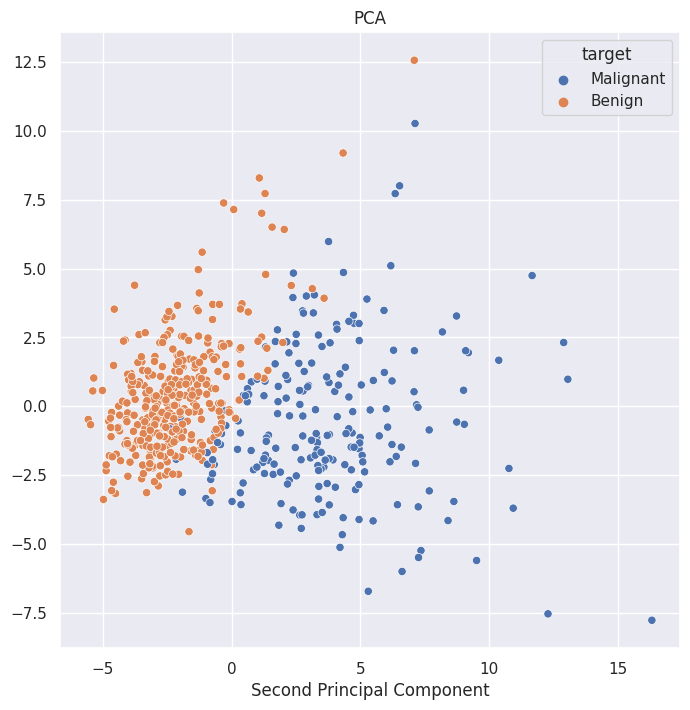

In [210]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['target'])
plt.title("PCA")
plt.xlabel("First Principal Component")
plt.xlabel("Second Principal Component")

In [ ]:
# User two principal components to clearly separate data between benign and malign

#### Train - Test Split

In [211]:
X = X_pca
y = df_target['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Support Vector Machines (SVM)

In [212]:
from sklearn.svm import SVC

#### Gridsearch

In [213]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [214]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [215]:
y_pred = grid.predict(X_test)

#### Model Evaluation

In [216]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n")
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 62   5]
 [  5 116]]


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        67
           1       0.96      0.96      0.96       121

    accuracy                           0.95       188
   macro avg       0.94      0.94      0.94       188
weighted avg       0.95      0.95      0.95       188

